In [1]:
import pandas as pd
import numpy as np
import librosa 
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import os
import csv
import soundfile
import sklearn
from matplotlib.colors import Normalize

# Visualizing features Abnormal vs Normal for pump


In [ ]:
path = os.chdir('C:/Users/makye/OneDrive/Documents/Career/BeCode/study/Data_preprocessing/audioProcessing/-6_dB_pump')
print(os.getcwd())

(20, 431)
(20, 431)


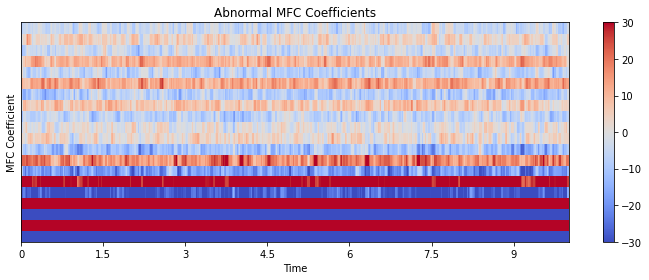

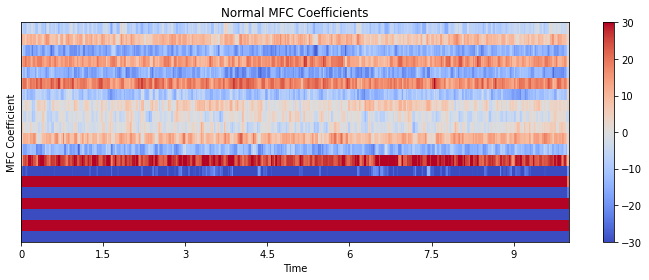

In [7]:
# Visualize our sample's MFC coefficients w.r.t time:

#Abnormal 
x , fs = librosa.load('pump/id_00/abnormal/00000000.wav') #sr = sampling rate
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Abnormal MFC Coefficients')
plt.tight_layout()


# #Normal
x , fs = librosa.load('pump/id_00/normal/00000000.wav') #sr = sampling rate
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
#Displaying  the MFCCs:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('Normal MFC Coefficients')
plt.tight_layout()

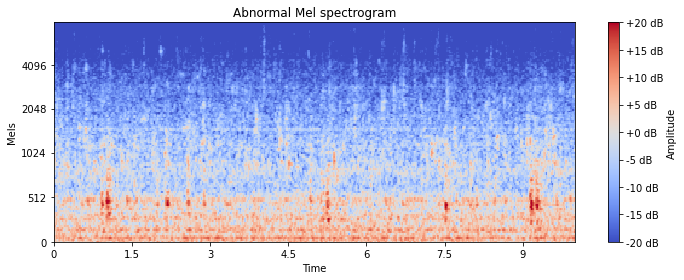

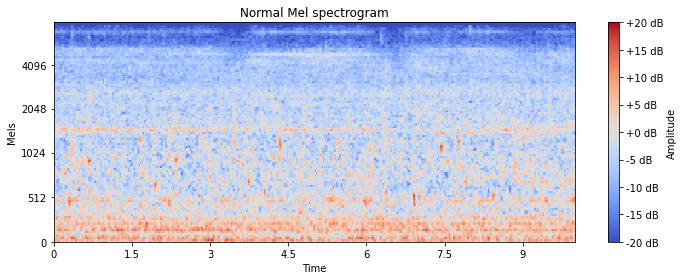

In [9]:
# Visualize our sample's Mel spectrogram w.r.t time:

#Abnormal
x , fs = librosa.load('pump/id_00/abnormal/00000000.wav') #sr = sampling rate
melspectrogram = librosa.feature.melspectrogram(y=x, sr=fs, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),
                         y_axis='mel',fmax=8000, x_axis='time', 
                         norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Abnormal Mel spectrogram')
plt.tight_layout()


#Normal
x , fs = librosa.load('pump/id_00/normal/00000000.wav') #sr = sampling rate
melspectrogram = librosa.feature.melspectrogram(y=x, sr=fs, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',
                         fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Normal Mel spectrogram')
plt.tight_layout()

16574
39680


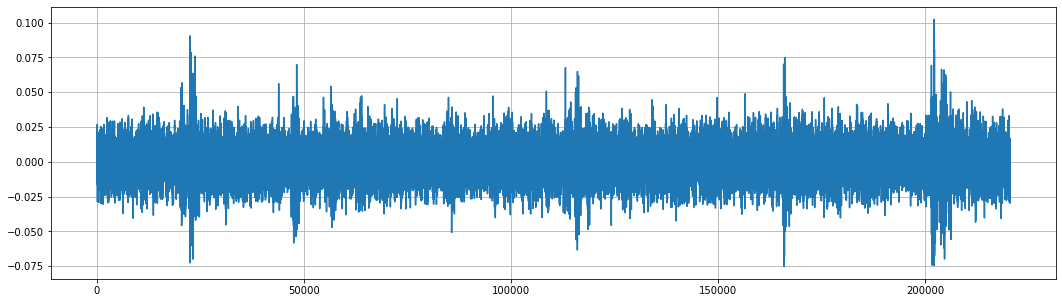

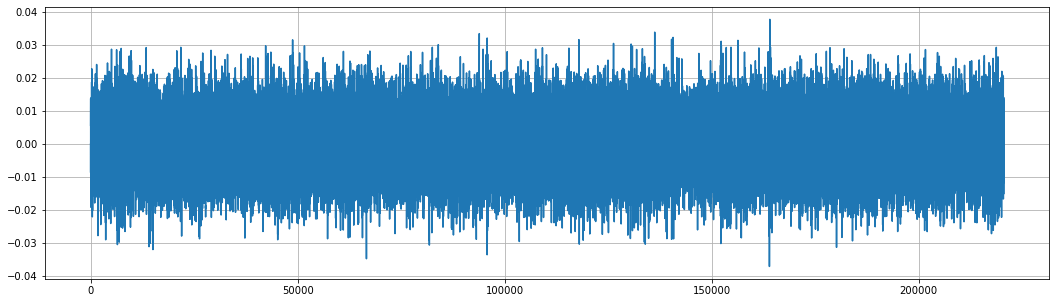

In [10]:
# Zero-crossing-rate

# Abnormal
x , fs = librosa.load('pump/id_00/abnormal/00000000.wav') #sr = sampling rate
zero_crossings = librosa.zero_crossings(x, pad=False)
plt.figure(figsize=(18, 5))
plt.plot(x)
plt.grid()
print(sum(zero_crossings))


#Normal
x , fs = librosa.load('pump/id_00/normal/00000000.wav') #sr = sampling rate
zero_crossings = librosa.zero_crossings(x, pad=False)
plt.figure(figsize=(18, 5))
plt.plot(x)
plt.grid()

print(sum(zero_crossings))

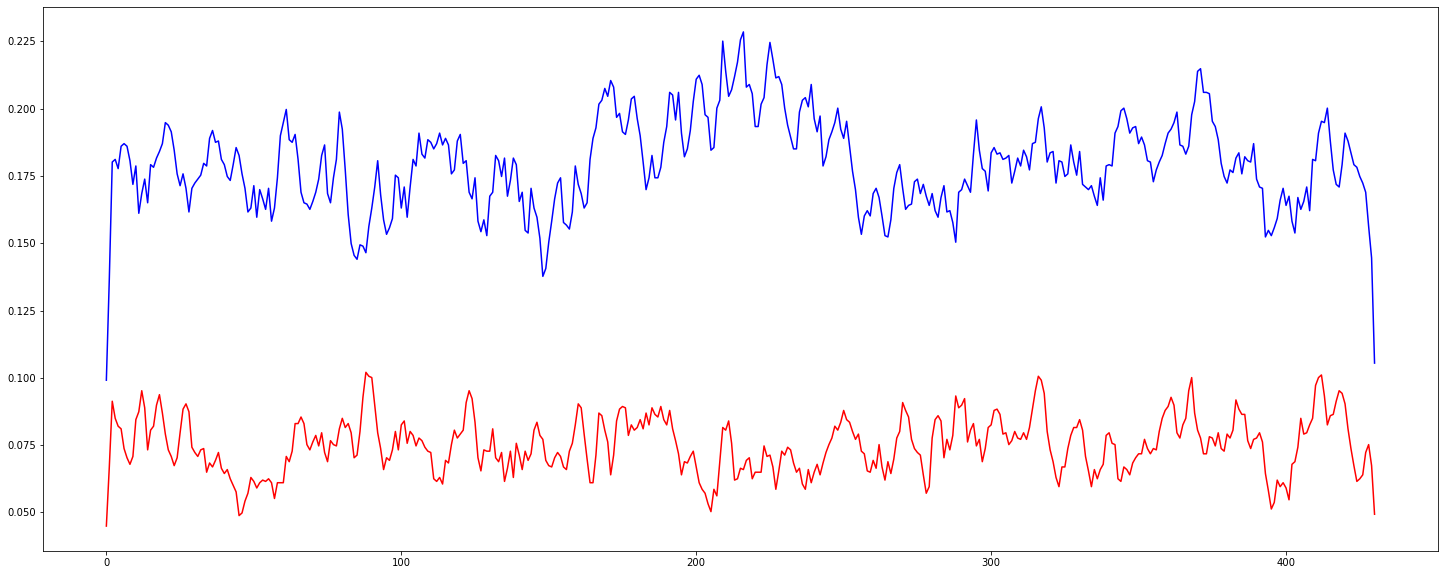

In [11]:
# Zero-crossing-rate (single wave)

#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.zero_crossing_rate(ab)[0]


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.zero_crossing_rate(no)[0]


plt.figure(figsize=(25,10))
plt.plot(abnormal, color='r')
plt.plot(normal, color='b')
plt.show()

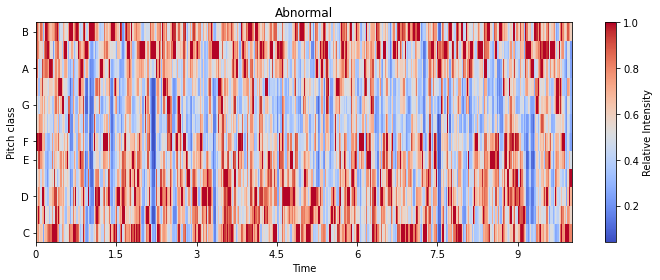

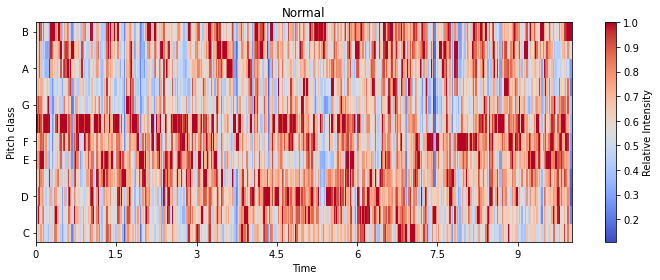

In [12]:
#Chromagram
# Visualize the chromagram for our sample audio:


#Abnormal
x , fs = librosa.load('pump/id_00/abnormal/00000000.wav') #sr = sampling rate
chromagram = librosa.feature.chroma_stft(y=x, sr=fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.colorbar(label='Relative Intensity')
plt.title('Abnormal')
plt.tight_layout()

#Normal
x , fs = librosa.load('pump/id_00/normal/00000000.wav') #sr = sampling rate
chromagram = librosa.feature.chroma_stft(y=x, sr=fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', cmap='coolwarm')
plt.colorbar(label='Relative Intensity')
plt.title('Normal')
plt.tight_layout()

In [13]:
# chromagram array
stft_spectrogram=np.abs(librosa.stft(x))
# Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=fs).T,axis=0)
chromagram

array([0.82746667, 0.84789956, 0.87303495, 0.8764382 , 0.85377306,
       0.8481486 , 0.878025  , 0.8118119 , 0.8222694 , 0.8516621 ,
       0.8457698 , 0.83404756], dtype=float32)

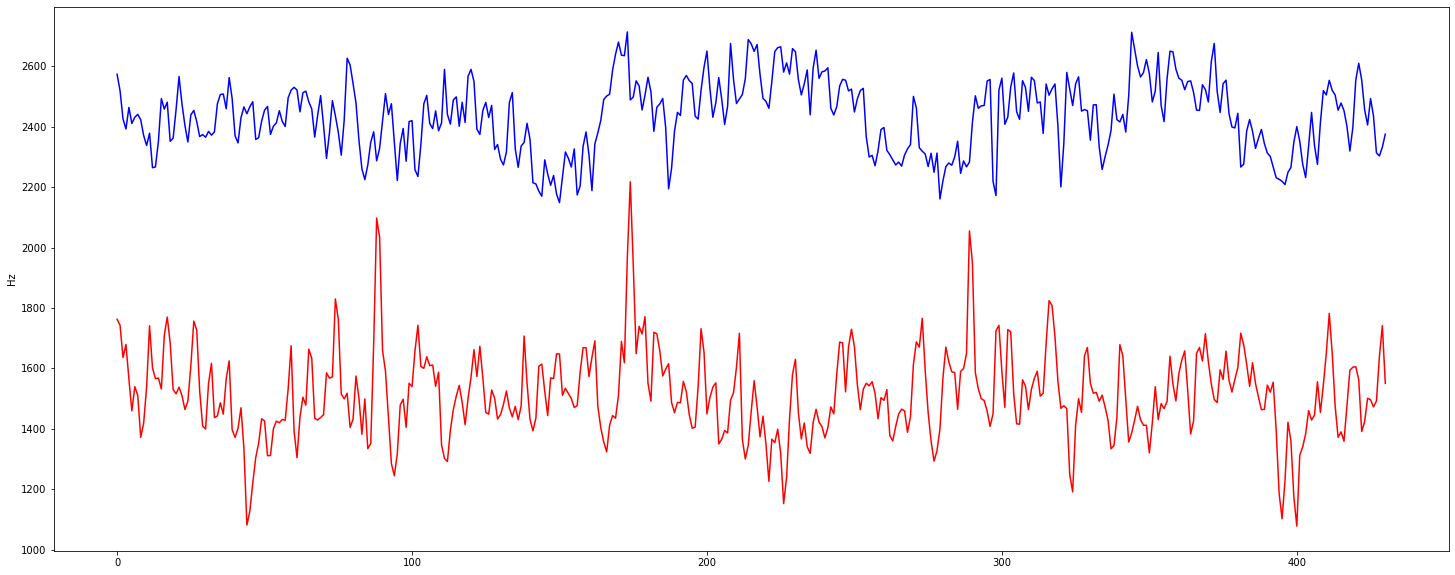

In [14]:
# Spectral centroid

#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.spectral_centroid(y=ab, sr=fs)[0]


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.spectral_centroid(y=no, sr=fs)[0]


plt.figure(figsize=(25,10))
plt.plot(abnormal, color='r')
plt.plot(normal, color='b')
plt.ylabel('Hz')
plt.show()

Text(0.5, 1.0, 'Spectral contrast-Normal')

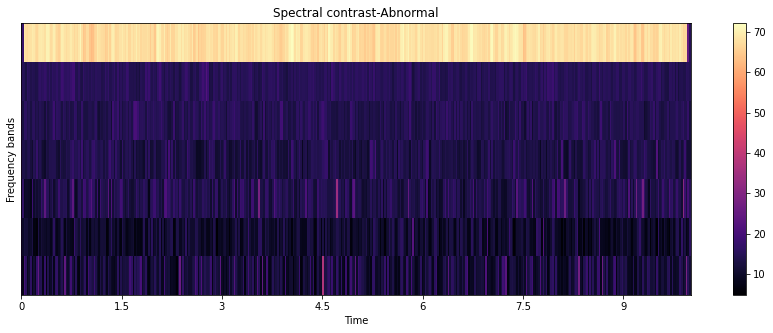

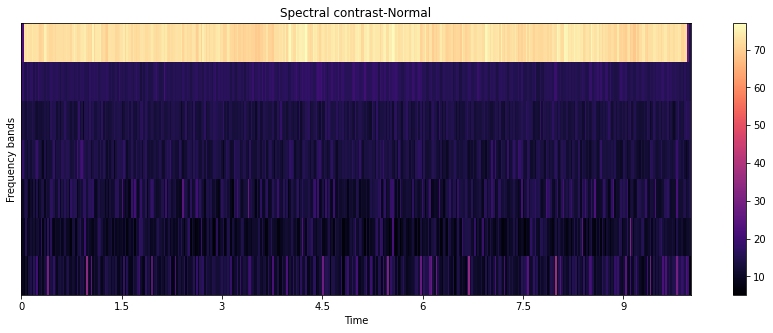

In [15]:
# Spectral Contrast


#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.spectral_contrast(y=ab,sr=fs)
plt.figure(figsize=(15,5))
librosa.display.specshow(abnormal, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast-Abnormal')


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.spectral_contrast(y=no,sr=fs)
plt.figure(figsize=(15,5))
librosa.display.specshow(normal, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast-Normal')

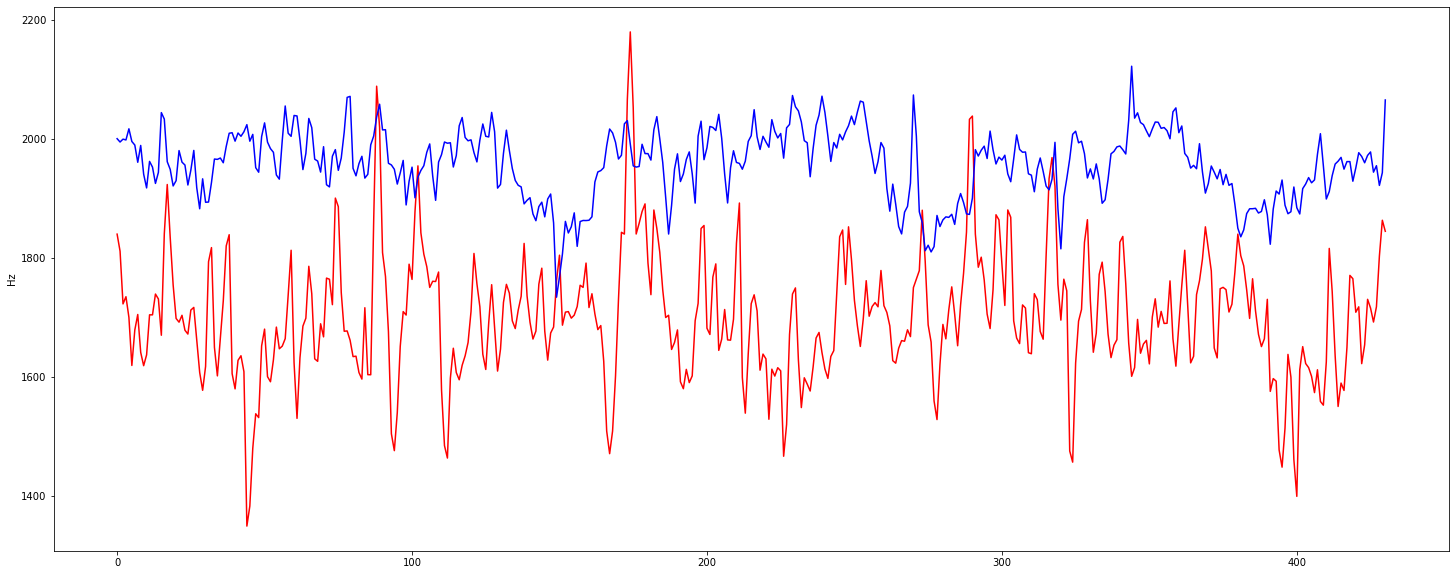

In [16]:
# Spectral bandwidth

#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.spectral_bandwidth(y=ab, sr=fs)[0]


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.spectral_bandwidth(y=no, sr=fs)[0]


plt.figure(figsize=(25,10))
plt.plot(abnormal, color='r')
plt.plot(normal, color='b')
plt.ylabel('Hz')
plt.show()

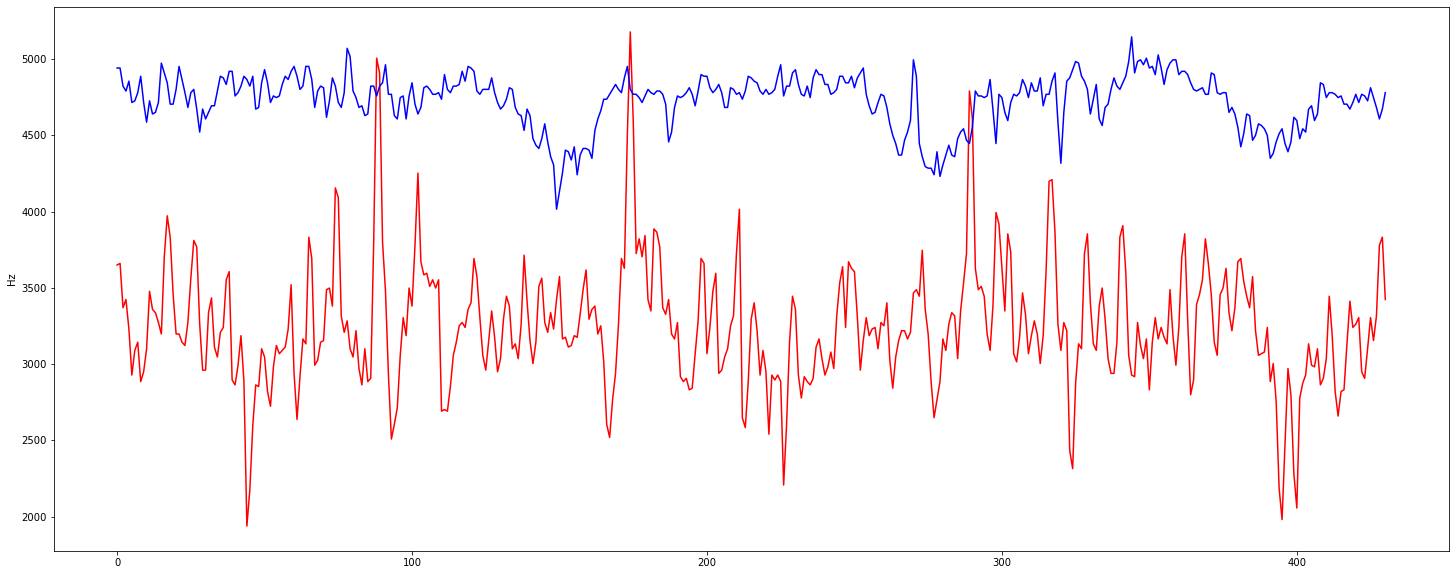

In [18]:
#Spectral rolloff

#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.spectral_rolloff(y=ab, sr=fs)[0]


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.spectral_rolloff(y=no, sr=fs)[0]


plt.figure(figsize=(25,10))
plt.plot(abnormal, color='r')
plt.plot(normal, color='b')
plt.ylabel('Hz')
plt.show()

C:\Users\makye\anaconda3\envs\AudioProcessing\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


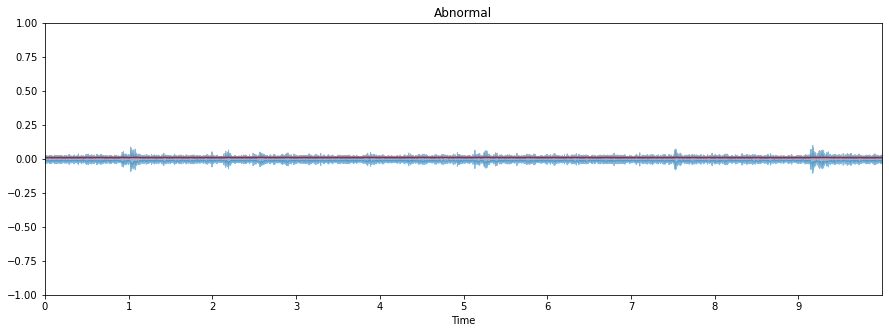

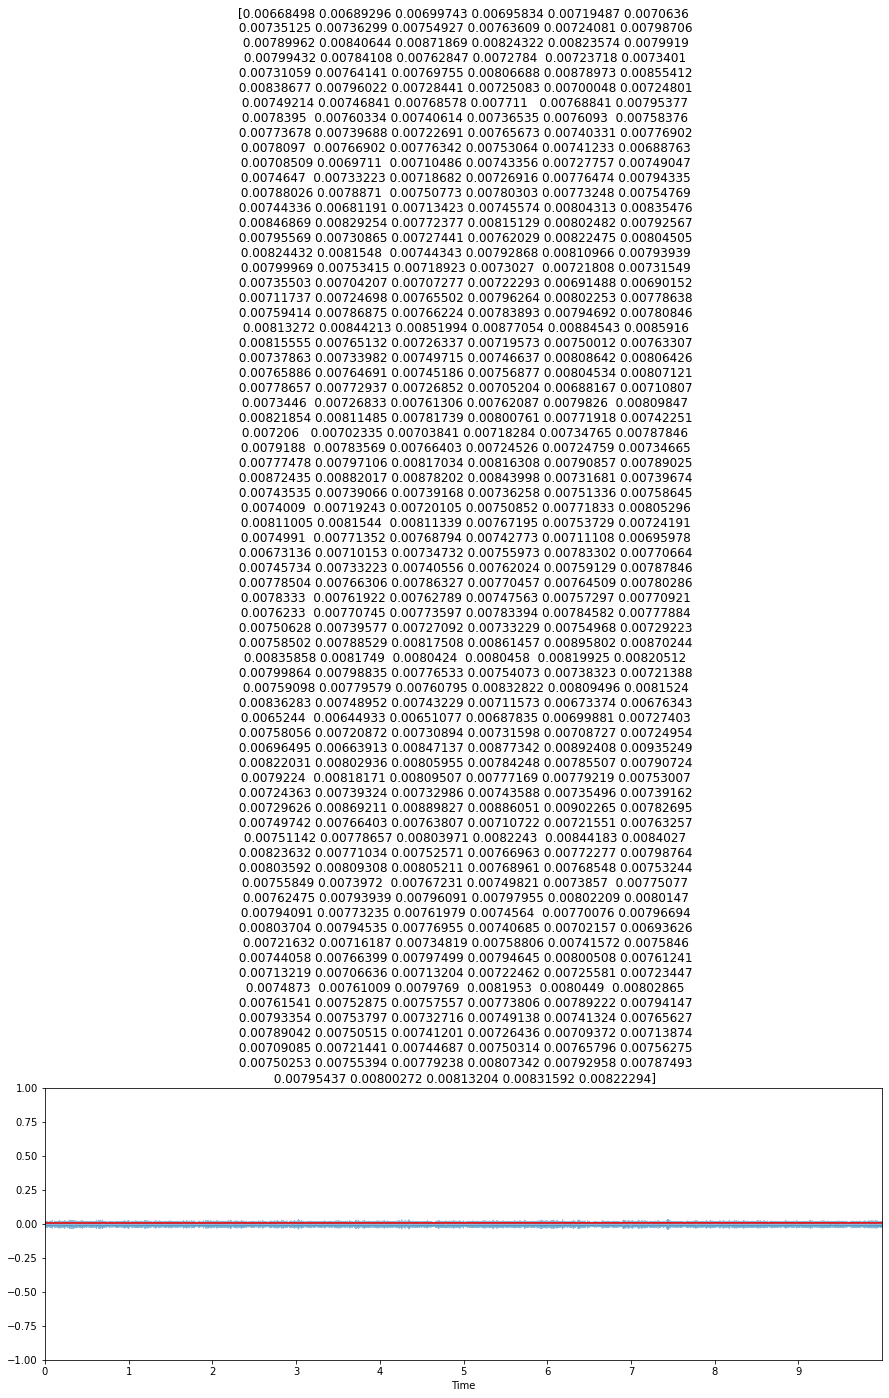

In [19]:
# RMS energy
# rms energy is graphed in red


#Abnormal
ab , fs = librosa.load('pump/id_00/abnormal/00000000.wav')
abnormal = librosa.feature.rms(ab)[0]
plt.figure(figsize=(15, 17))
ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(ab, alpha=0.5)
plt.plot(abnormal, color="r")
plt.ylim((-1, 1))
plt.title("Abnormal")


#Normal
no , fs = librosa.load('pump/id_00/normal/00000000.wav')
normal = librosa.feature.rms(no)[0]

plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 2)
librosa.display.waveplot(no, alpha=0.5)
plt.plot(normal, color="r")
plt.ylim((-1, 1))
plt.title(normal)

plt.show()

In [20]:
#Amplitude Envolpe

FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

def fancy_amplitude_envelope(signal):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [21]:
# calculate amplitude envelope for RHCP and Duke Ellington
abnormal = amplitude_envelope(ab, FRAME_SIZE, HOP_LENGTH)
normal = amplitude_envelope(no, FRAME_SIZE, HOP_LENGTH)

Text(0.5, 1.0, 'Normal')

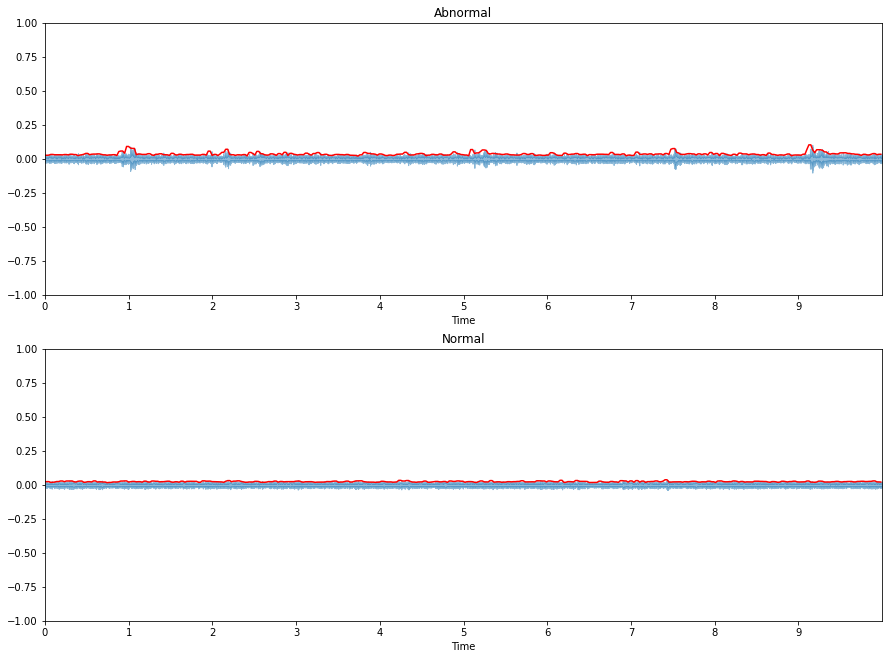

In [22]:
# vsiualizing 
frames = range(len(abnormal))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(ab, alpha=0.5)
plt.plot(t, abnormal, color="r")
plt.ylim((-1, 1))
plt.title("Abnormal")

plt.subplot(3, 1, 2)
librosa.display.waveplot(no, alpha=0.5)
plt.plot(t, normal, color="r")
plt.ylim((-1, 1))
plt.title("Normal")


In [ ]:
#Features to Extract!!

spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
Constant Q-transform (CQT)